# Kernel SVM. A first approach with Scikit-learn

Copy and paste implementation of SVM with Kernel on blurred XOR data using `scikit-learn` and `keras` modules. (following SR book)

### Libraries and Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# borrowing from raschka's the decision region plotter
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ("s", "x", "0", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1 , X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1 , X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')
    return plt

## Data Loading and Visualization

We will create a simple dataset that has the form of an XOR gate using the `logical_xor` function from NumPy

In [11]:
np.random.seed(0)
X_xor = np.random.randn(300,2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)

<function matplotlib.pyplot.show(*args, **kw)>

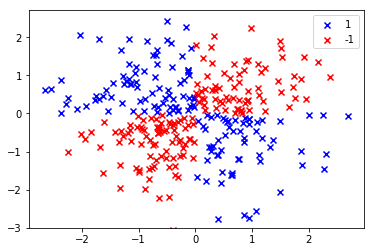

In [12]:
plt.scatter(
            X_xor[y_xor==1,0],
            X_xor[y_xor==1,1],
            c = 'b', marker = 'x', label = "1"
            )
plt.scatter(
            X_xor[y_xor==-1,0],
            X_xor[y_xor==-1,1],
            c = 'r', marker = 'x', label = "-1"
            )
plt.ylim(-3.0)
plt.legend()
plt.show

## Data Preparation

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_xor,y_xor,test_size=0.30)

## Model Definition
We then define a Support Vector Machine Classificator with Gaussian kernel in order to draw a non-linear decision boundary 

In [34]:
from sklearn.svm import SVC
model = SVC(
            kernel = 'rbf',
            random_state = 0,
            gamma = 0.10, C = 10.0
            )

## Model Fit

In [35]:
model.fit(x_train, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

## Model Predict

In [36]:
pred=model.predict(x_test)

## Model Evaluation

In [37]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Module for plotting confusion matrix:
def confusion_matrix_plot (y_test, pred):
    df_cm = pd.DataFrame(confusion_matrix(y_test,pred))
    #plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<module 'matplotlib.pyplot' from '/home/mario/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

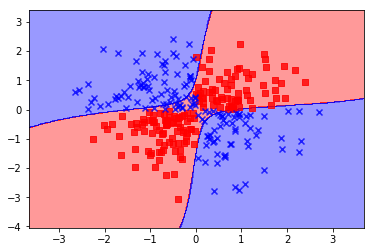

In [38]:
plot_decision_regions(X_xor, y_xor, classifier=model)

In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.85      0.98      0.91        48
           1       0.97      0.81      0.88        42

   micro avg       0.90      0.90      0.90        90
   macro avg       0.91      0.89      0.90        90
weighted avg       0.91      0.90      0.90        90

